In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris_data = load_iris()
data = iris_data['data']
targets = iris_data['target']

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.3)
train_data.shape, test_data.shape, train_targets.shape, test_targets.shape

((105, 4), (45, 4), (105,), (45,))

In [14]:
inp = tf.keras.Input(shape=(4,))
out = tf.keras.layers.Dense(16, activation='relu')(inp)
out = tf.keras.layers.Dense(16, activation='relu')(out)
out = tf.keras.layers.Dense(16, activation='relu')(out)
out = tf.keras.layers.Dense(3)(out)

model = tf.keras.Model(inp, out)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 51        
Total params: 675
Trainable params: 675
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [16]:
history = model.fit(train_data, train_targets, batch_size=128, epochs=1500, verbose=False)

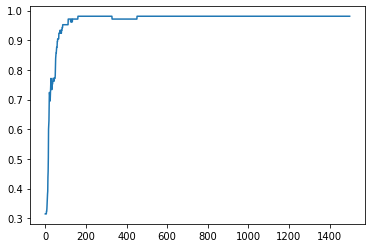

In [17]:
plt.plot(history.history['acc'])

In [18]:

model.evaluate(test_data, test_targets, verbose=False)

[0.015144146978855133, 1.0]